In [19]:
import torch 
from torch import nn

import torchvision
from torchvision import transforms, datasets
from DCGAN import Generator, Discriminator, initialize_weights
import DCGAN2

from pathlib import Path
import matplotlib.pyplot as plt

In [20]:
# Device agnostic code

if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
device

'cuda'

### **MNIST Data**

In [21]:
# Hyperparameters 

BATCH_SIZE = 32
IMAGE_SIZE = (64, 64)
CHANNELS = 1
Z_DIM = 100
DISC_HIDDEN = 64
GEN_HIDDEN = 64
GENERATOR_SAVE_PATH = 'Models/mnist_first_generator.pth'
DISCRIMINATOR_SAVE_PATH = 'Models/mnist_first_discriminator.pth'

In [22]:
# Creating model instances

generator = Generator(latent_channels=Z_DIM, hidden_channels=GEN_HIDDEN, img_channels=CHANNELS).to(device)
initialize_weights(generator)

discriminator = Discriminator(in_channels=CHANNELS, hidden_channels=DISC_HIDDEN).to(device)
initialize_weights(discriminator)

In [23]:
# Saving and loading models

model_file = Path(GENERATOR_SAVE_PATH)
if model_file.is_file():
    generator.load_state_dict(torch.load(f=GENERATOR_SAVE_PATH))
    print("A generator aleady exists... Loading that model")
else:
    print("A generator does not exist in the specified path")
    
model_file = Path(DISCRIMINATOR_SAVE_PATH)
if model_file.is_file():
    discriminator.load_state_dict(torch.load(f=DISCRIMINATOR_SAVE_PATH))
    print("A discriminator aleady exists... Loading that model")
else:
    print("A discriminator does not exist in the specified path...")

A generator aleady exists... Loading that model
A discriminator aleady exists... Loading that model


In [39]:
# Generating output samples

generator.eval()
discriminator.eval()
with torch.inference_mode():
    noise = torch.randn(BATCH_SIZE, Z_DIM, 1, 1, device=device)
    fake_img = generator(noise).cpu()

The fake MNIST images generated are shown below:


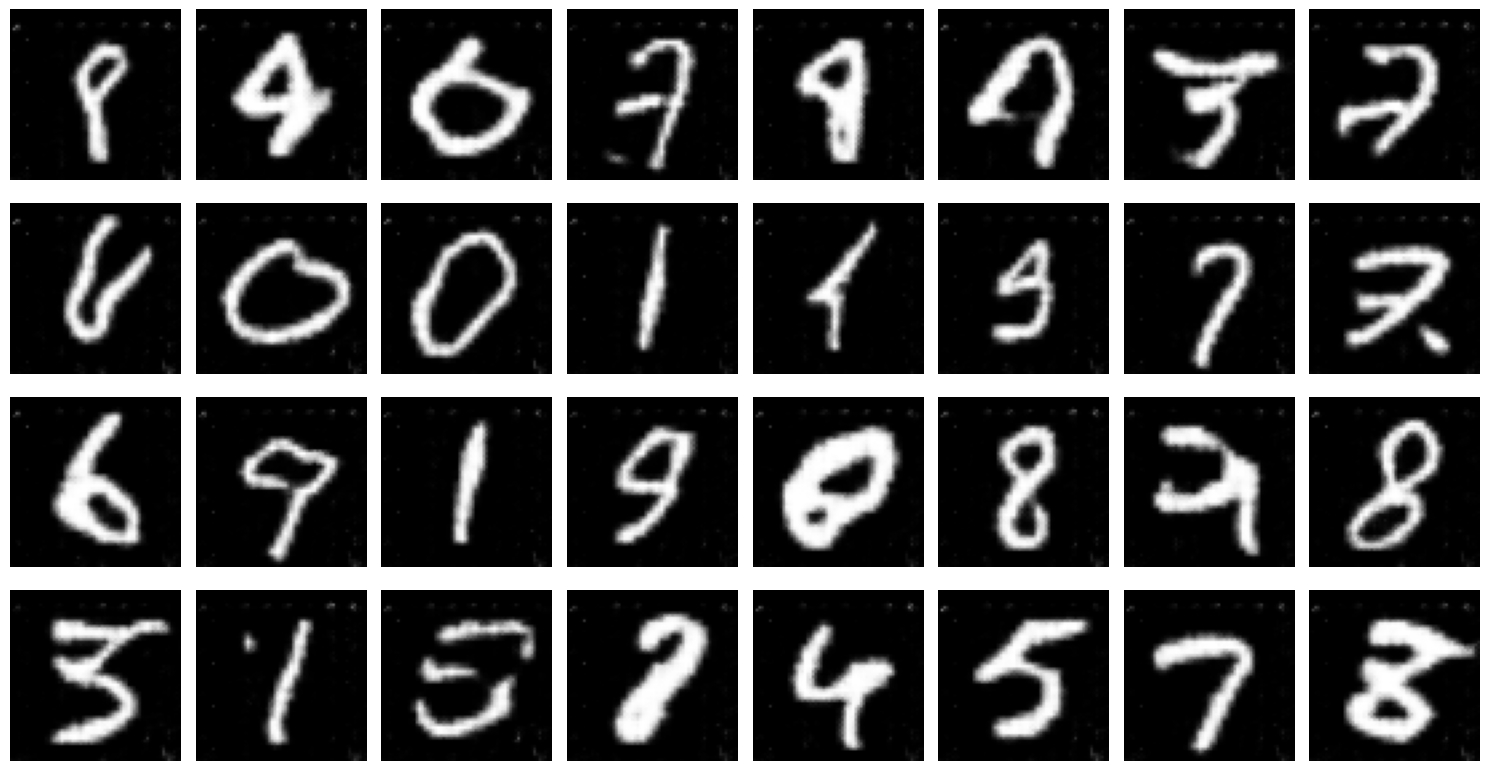

In [40]:
fig, ax = plt.subplots(4, 8, figsize=(15, 8))

for i, ax in enumerate(ax.flat):
    ax.imshow(fake_img[i].squeeze(dim=0), cmap='gray')
    ax.axis(False);
    
plt.tight_layout()
print('The fake MNIST images generated are shown below:')
plt.show()

### **Celebal Data**

In [8]:
# Hyperparameters 

BATCH_SIZE = 32
IMAGE_SIZE = (64, 64)
CHANNELS = 3
Z_DIM = 256
DISC_HIDDEN = 64
GEN_HIDDEN = 64
GENERATOR_SAVE_PATH = 'Models/celebal_first_generator.pth'
DISCRIMINATOR_SAVE_PATH = 'Models/celebal_first_discriminator.pth'

In [9]:
# Creating model instances

generator = Generator(latent_channels=Z_DIM, hidden_channels=GEN_HIDDEN, img_channels=CHANNELS).to(device)
initialize_weights(generator)

discriminator = Discriminator(in_channels=CHANNELS, hidden_channels=DISC_HIDDEN).to(device)
initialize_weights(discriminator)

In [10]:
# Saving and loading models

model_file = Path(GENERATOR_SAVE_PATH)
if model_file.is_file():
    generator.load_state_dict(torch.load(f=GENERATOR_SAVE_PATH))
    print("A generator aleady exists... Loading that model")
else:
    print("A generator does not exist in the specified path")
    
model_file = Path(DISCRIMINATOR_SAVE_PATH)
if model_file.is_file():
    discriminator.load_state_dict(torch.load(f=DISCRIMINATOR_SAVE_PATH))
    print("A discriminator aleady exists... Loading that model")
else:
    print("A discriminator does not exist in the specified path...")

A generator aleady exists... Loading that model
A discriminator aleady exists... Loading that model


In [11]:
# Generating output samples

generator.eval()
discriminator.eval()
with torch.inference_mode():
    noise = torch.randn(BATCH_SIZE, Z_DIM, 1, 1, device=device)
    fake_img = generator(noise).cpu()
fake_img = torch.clamp((fake_img + 1) / 2, 0, 1)

The fake Celebal face images generated are shown below:


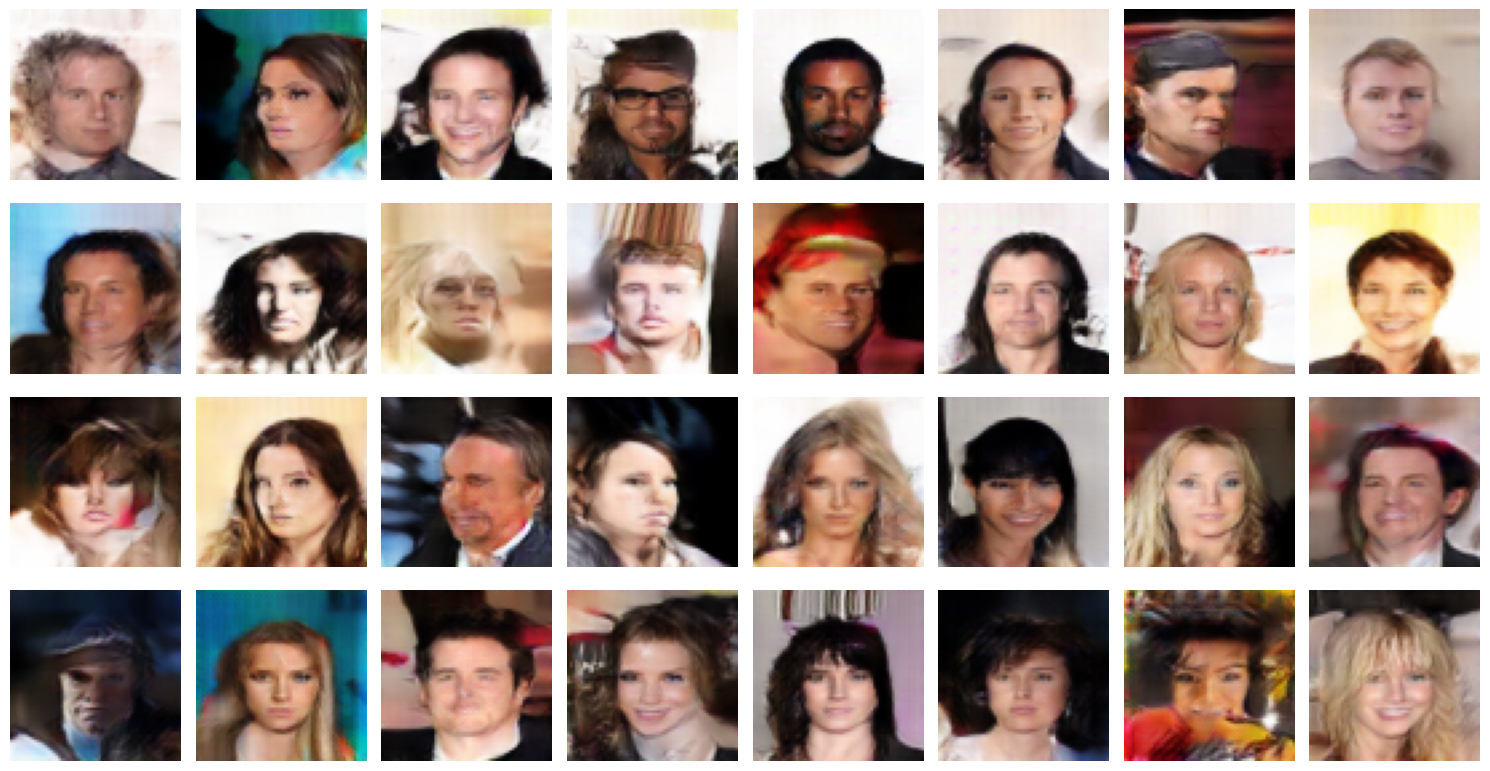

In [12]:
fig, ax = plt.subplots(4, 8, figsize=(15, 8))

for i, ax in enumerate(ax.flat):
    ax.imshow(fake_img[i].permute(1,2,0))
    ax.axis(False);
    
plt.tight_layout()
print('The fake Celebal face images generated are shown below:')
plt.show()

### **Celebal Data using deeper network**

In [13]:
# Hyperparameters 

BATCH_SIZE = 32
IMAGE_SIZE = (64, 64)
CHANNELS = 3
Z_DIM = 256
DISC_HIDDEN = 128
GEN_HIDDEN = 64
GENERATOR_SAVE_PATH = 'Models/celebal_third_generator.pth'
DISCRIMINATOR_SAVE_PATH = 'Models/celebal_third_discriminator.pth'

In [14]:
# Creating model instances

generator = DCGAN2.Generator(latent_channels=Z_DIM, hidden_channels=GEN_HIDDEN, img_channels=CHANNELS).to(device)
DCGAN2.initialize_weights(generator)

discriminator = DCGAN2.Discriminator(in_channels=CHANNELS, hidden_channels=DISC_HIDDEN).to(device)
DCGAN2.initialize_weights(discriminator)

In [15]:
# Saving and loading models

model_file = Path(GENERATOR_SAVE_PATH)
if model_file.is_file():
    generator.load_state_dict(torch.load(f=GENERATOR_SAVE_PATH))
    print("A generator aleady exists... Loading that model")
else:
    print("A generator does not exist in the specified path")
    
model_file = Path(DISCRIMINATOR_SAVE_PATH)
if model_file.is_file():
    discriminator.load_state_dict(torch.load(f=DISCRIMINATOR_SAVE_PATH))
    print("A discriminator aleady exists... Loading that model")
else:
    print("A discriminator does not exist in the specified path...")

A generator aleady exists... Loading that model
A discriminator aleady exists... Loading that model


In [16]:
# Generating output samples

generator.eval()
discriminator.eval()
with torch.inference_mode():
    noise = torch.randn(BATCH_SIZE, Z_DIM, 1, 1, device=device)
    fake_img = generator(noise).cpu()
fake_img = torch.clamp((fake_img + 1) / 2, 0, 1)

The fake Celebal face images generated are shown below:


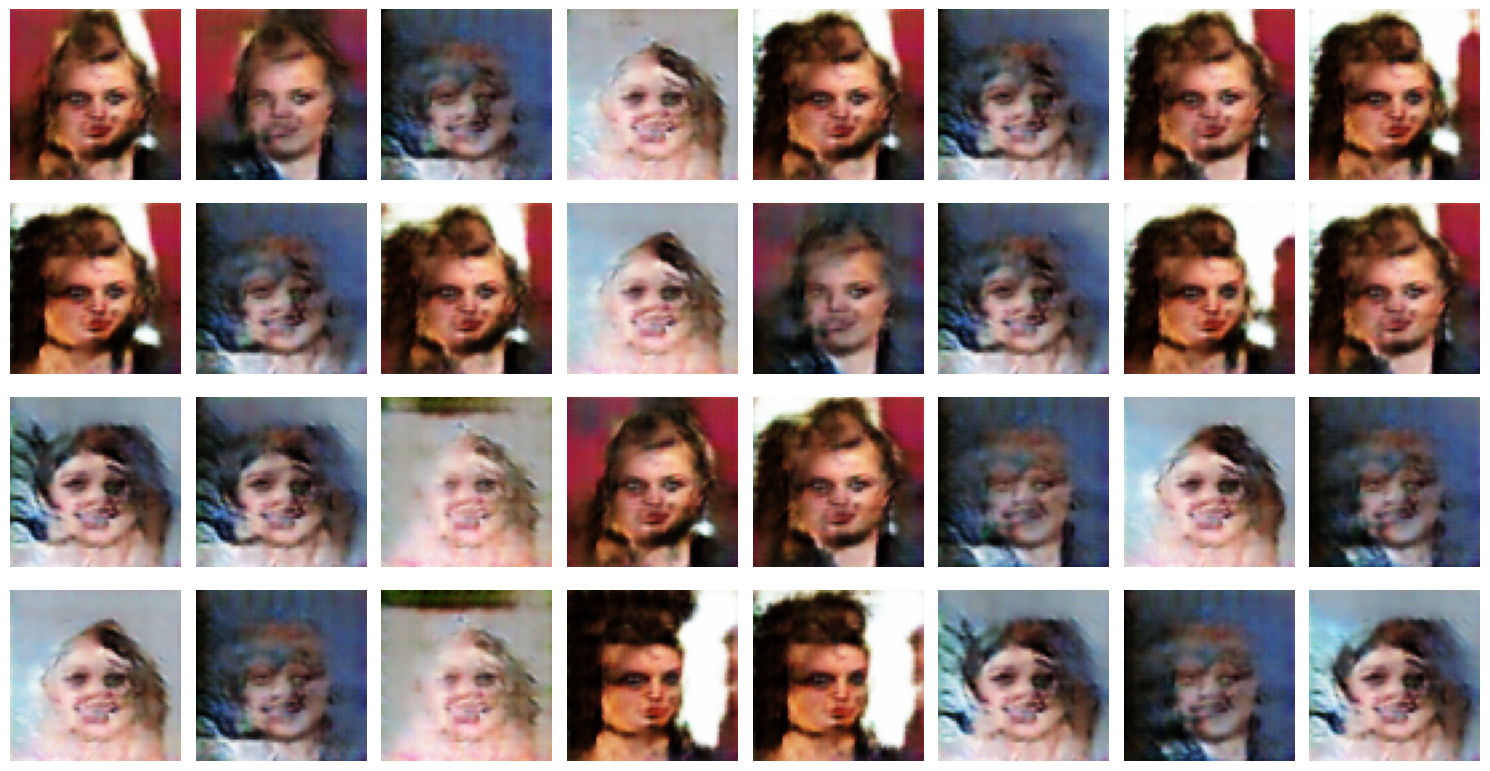

In [17]:
fig, ax = plt.subplots(4, 8, figsize=(15, 8))

for i, ax in enumerate(ax.flat):
    ax.imshow(fake_img[i].permute(1,2,0))
    ax.axis(False);
    
plt.tight_layout()
print('The fake Celebal face images generated are shown below:')
plt.show()